# Introduction

Advertising has been, and likely always will be, an integral part of our capitalist society. Where there is demand, there is an opportunity to earn. As such, optimizing advertisements is essential for any company looking to increase revenue. This optimization can come from changing colors, wording, or even where you see an ad. Anyone familiar with internet browsing will know how often ads are shown, all with the goal of getting you to click to learn more. Maybe clicking takes you to an amazon page or to a front page for the brand, either way, the click is a powerful step in advertising. This analysis seeks to answer the question: "What strategy best ensures a viewer clicks on an ad?" To answer this question, we will examine the the ads position and the details around when it's shown, including time, browsing history, and what device the ad is being viewed on.

## The Data

Our data comes from the ["Ad Click Prediction Dataset"](https://www.kaggle.com/datasets/marius2303/ad-click-prediction-dataset) on kaggle, collected by Ciobanu Marius. The data consists of 10,000 entries across 9 features. These features include:
1. <b>id</b> - the id given to the viewer
2. <b>full_name</b> - the name of the viewer (formatted as 'UserX' for anonymity)
3. <b>age</b> - the age of the viewer
4. <b>gender</b> - the gender of the viewer
5. <b>device_type</b> - the type of device used
6. <b>ad_position</b> - the position of the ad on the page
7. <b>browsing_history</b> - what type of browsing was happening before the ad was shown
8. <b>time_of_day</b> - the time the ad was seen
9. <b>click</b> - the binary target value for whether the ad was clicked<br>

Of the variables, <b>id</b> and <b>full_name</b> are identifying variables and therefore aren't meant to be used as predictors. <b>age</b> is the only numerical variable, with the rest being categorical, aside from our target variable <b>click</b>. We can observe below that the dataset appears to be a little unbalanced, with our target variable returning '1' 6,500 times and '0' only 3,500 times.

In [89]:
import pandas as pd

In [90]:
# import dataset into a Pandas dataframe
df = pd.read_csv('ad_click_dataset.csv')

#View dataset
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [91]:
#dataset dimensions
df.shape

(10000, 9)

In [92]:
#dataset features and datatypes
df.dtypes

id                    int64
full_name            object
age                 float64
gender               object
device_type          object
ad_position          object
browsing_history     object
time_of_day          object
click                 int64
dtype: object

In [93]:
df['click'].value_counts()

click
1    6500
0    3500
Name: count, dtype: int64

## Preprocessing

Our preprocessing begins by examining the number of null values in each variable. We can see below that a large number of values are left null, meaning we cannot just remove all entries with invalid data. We will keep this in mind as we build out our model.

In [94]:
#check for missing values
df.isnull().sum()

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

Next, we check for any duplicate entries. Here we find that 2,853 entries are duplicates. At first this could be explained by the limited amount of values in each variable. This can be disproved, however, after considering the <b>id</b> column. Therefore, these entries must be removed. Observing the new balance of data, we see that all duplicated entries were returning a '1' for <b>click</b>. On top of balancing our dataset, this also removes some of the null value entries as well, meaning less of our data is missing.

In [95]:
df.duplicated().sum()

2853

In [96]:
df_clean = df.drop_duplicates()
df_forGraphs = df_clean
df_clean['click'].value_counts()

click
1    3647
0    3500
Name: count, dtype: int64

In [97]:
df_clean.isnull().sum()

id                     0
full_name              0
age                 3476
gender              3400
device_type         1728
ad_position         1743
browsing_history    3480
time_of_day         1712
click                  0
dtype: int64

Now we begin the process of converting categorical variables into binary ones. <b>gender</b>, <b>device_type</b>, <b>ad_position</b>, <b>browsing_history</b>, and <b>time_of_day</b> can all be broken down using dummy encoding. We simply create coloumns of each possible answer in the categorical variables and remove the original variables when we are done. This reshaping of the dataset turns our 9 original variables into 22 total features, of which 18 are the new binary variables. Splitting up the variables in this way will allow us to see the differences in each value.

In [98]:
# Gets every unique value for 'gender', and creates boolean columns for each.
gender_dummies = pd.get_dummies(df_clean['gender'], dtype='int64')
df_clean = pd.concat([df_clean, gender_dummies], axis=1)
df_clean = df_clean.drop(['gender'], axis=1)

# Gets every unique value for 'device_type', and creates boolean columns for each.
device_dummies = pd.get_dummies(df_clean['device_type'], dtype='int64')
df_clean = pd.concat([df_clean, device_dummies], axis=1)
df_clean = df_clean.drop(['device_type'], axis=1)

# Gets every unique value for 'ad_position', and creates boolean columns for each.
ad_dummies = pd.get_dummies(df_clean['ad_position'], dtype='int64')
df_clean = pd.concat([df_clean, ad_dummies], axis=1)
df_clean = df_clean.drop(['ad_position'], axis=1)

#Gets every unique value for 'browsing_history', and creates boolean columns for each.
history_dummies = pd.get_dummies(df_clean['browsing_history'], dtype='int64')
df_clean = pd.concat([df_clean, history_dummies], axis=1)
df_clean = df_clean.drop(['browsing_history'], axis=1)

#Gets every unique value for 'time_of_day', and creates boolean columns for each.
time_dummies = pd.get_dummies(df_clean['time_of_day'], dtype='int64')
df_clean = pd.concat([df_clean, time_dummies], axis=1)
df_clean = df_clean.drop(['time_of_day'], axis=1)


# View dataset
df_clean

,id,full_name,age,click,Female,Male,Non-Binary,Desktop,Mobile,Tablet,...,Top,Education,Entertainment,News,Shopping,Social Media,Afternoon,Evening,Morning,Night
0,670,User670,22.0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
1,3044,User3044,NaN,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,5912,User5912,41.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,5418,User5418,34.0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9452,User9452,39.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,NaN,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
9996,7843,User7843,NaN,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9997,3914,User3914,NaN,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9998,7924,User7924,NaN,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


And this concludes our data cleaning and preprocessing, which means its time to move on to...

## Data Visualization

Below is a series of five double bar plots. Each one covers one of the five categorical variables: <b>gender</b>, <b>device_type</b>, <b>ad_position</b>, <b>browsing_history</b>, and <b>time_of_day</b>. Here they count they number of entries that each category has for both clicking and not clicking the ad. Surprisingly, there is no immediate connection that jumps out between any of these values and the outcome of <b>click</b>. 

In [99]:
import matplotlib.pyplot as plt
import numpy as np

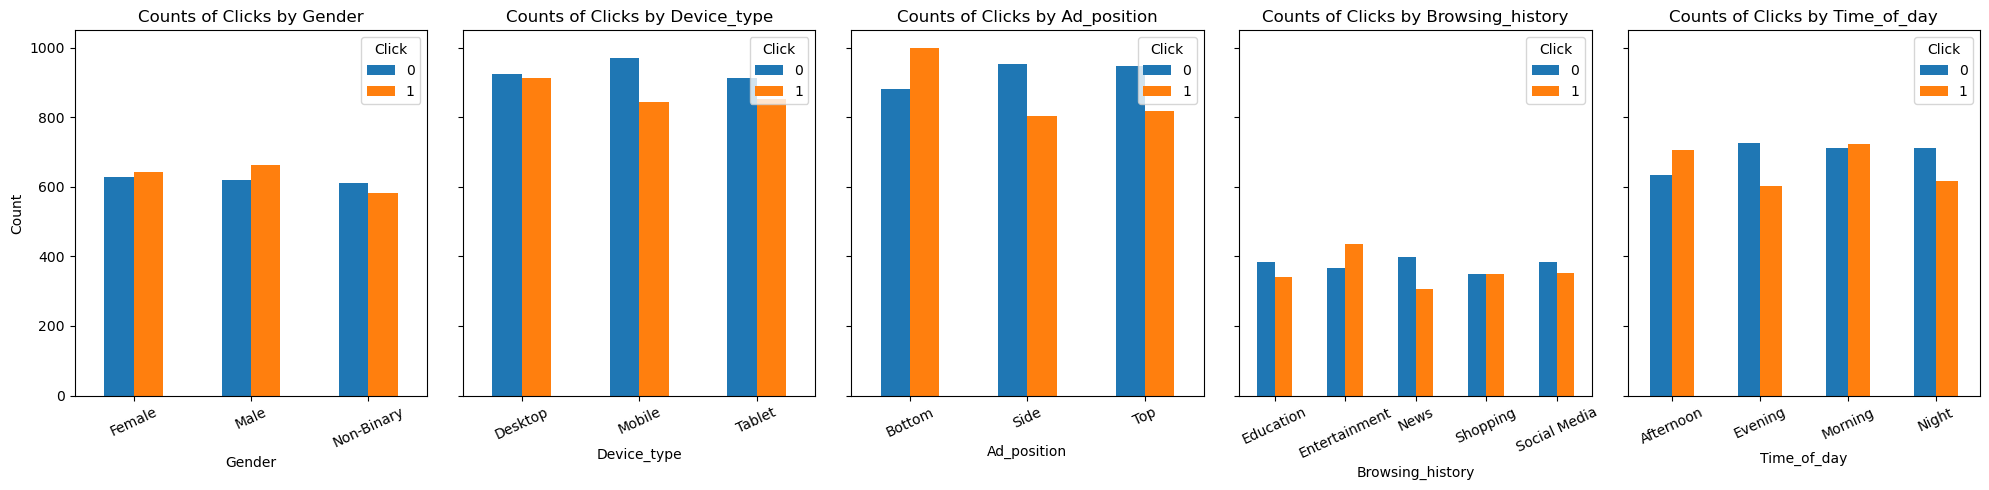

In [100]:
main_variables = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)


for ax, variable in zip(axes, main_variables):
    # Group by the current variable and 'click', then count the occurrences
    variable_click_counts = df_forGraphs.groupby([variable, 'click']).size().unstack(fill_value=0)
    
    # Plot the bar chart for the current variable
    variable_click_counts.plot(kind='bar', ax=ax, stacked=False)
    ax.set_title(f'Counts of Clicks by {variable.capitalize()}')
    ax.set_xlabel(variable.capitalize())
    ax.set_ylabel('Count' if ax == axes[0] else '')  # Show y-label only on the first plot
    ax.legend(title='Click')
    ax.tick_params(axis='x', rotation=25)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

## Modeling

Due to the lack of connection between the categorical values and the target, we predicted that models would struggle to perform much better than a coinflip, sitting close to 50% accuracy. To have as many views of the data as possible, we create three different models. Each model was trained on 80% of the data, using the last 20% for testing, but each model was trained independantly and with a different assortment of data.

### Model 1 - Naive Bayes

First, we create a Naive Bayes model, which was chosen for its impartialty to features. Since the dataset has a roughly equal distribution of each feature, Naive Bayes was selected as it treats each feature equally. This aspect of a Naive Bayes model usually acts as a negative, but here it is negated. Naive Bayes functions by calculating the odds that a combination of values will be true or false, and categorizing the object based on which equation is greater. For example, one equation may look like this: P(1) * P(Male and 1) * P(Desktop and 1) = Y. In this equation, P(1) represents the total number of entries where the target is 1, P(Male and 1) represents the number of entries that have Gender as Male and the target is 1, P(Desktop and 1) represents the number of entries that have Device_type as Desktop and the target is 1, and Y represents the odds of an entry with this combination of values having a target value of 1. This equations is then calculated again, this time using data where the target is 0. The two calculated values are compared and the new entry is categorized depending on which expression returned the higher odds.

The only additional processing that needs to be performed is to convert any null values to '-1', as Naive Bayes cannot run with Nulls.

In [153]:
# import libraries for splitting data
from sklearn.model_selection import train_test_split

# Replace null values in 'Age' with -1
df_model1 = df_clean
df_model1['age'] = df_model1['age'].fillna(-1)
df_model1.isnull().sum()

# Split data into predictors and target
X = df_model1.drop(columns = ['id', 'full_name', 'click'])
y = df_model1['click']

In [154]:
# Split data into train and test, using 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Show the shape of training and testing data
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5717, 19)
X_test shape:  (1430, 19)
y_train shape:  (5717,)
y_test shape:  (1430,)


In [155]:
# import libraries for Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Create Naive Bayes model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

# Predict on the test data
y_pred = model_NB.predict(X_test)

Accuracy:  0.5622377622377622
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       711
           1       0.56      0.60      0.58       719

    accuracy                           0.56      1430
   macro avg       0.56      0.56      0.56      1430
weighted avg       0.56      0.56      0.56      1430



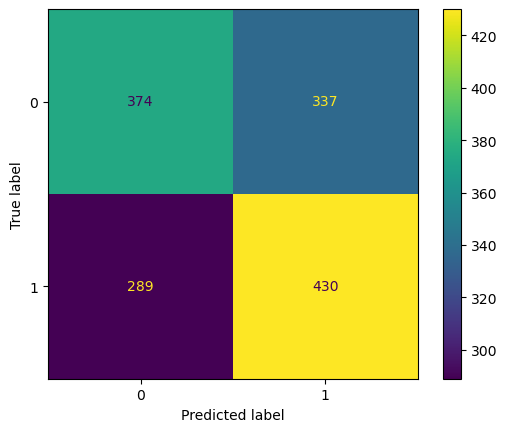

In [186]:
# import libraries for model analysis
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score)

# Print classification report
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

As seen above, this model does not perform very well, barely predicting better than 50%. Variations of this model using a different 'random_state' when selecting training/testing data had accuracy ratings between 45% and 65%. This shows that the model on average performs slightly better than complete guessing, but not by much. The data above is a good representation of the average Naive Bayes model. 

These results were predicted, as nearly all data in the exploration phase showed no apparent favor to either target outcome, but in order to verify these findings we construct two more models.

### Model 2 - Random Forest

The next model used is a Random Forest model, which creates a large number of Decision Trees and merges them for a more consistent set of rules when determining which category an entry should be placed in. One benefit of using a Random Forest model is that it can function with null values, meaning we do not have to change <b>age</b> and can use the data more faithfully.

In [183]:
# create a copy of the dataframe
df_model2 = df_clean

# Split data into predictors and target
X2 = df_model2.drop(columns = ['id', 'full_name', 'click'])
y2 = df_model2['click']

# Split data into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=6)

# Show the shape of training and testing data
print("X2_train shape: ", X2_train.shape)
print("X2_test shape: ", X2_test.shape)
print("y2_train shape: ", y2_train.shape)
print("y2_test shape: ", y2_test.shape)

X2_train shape:  (5717, 19)
X2_test shape:  (1430, 19)
y2_train shape:  (5717,)
y2_test shape:  (1430,)


In [184]:
# import libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
rf = RandomForestClassifier()
rf.fit(X2_train, y2_train)

# Predict on the test data
y2_pred = rf.predict(X2_test)

Accuracy:  0.6027972027972028
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       689
           1       0.61      0.65      0.63       741

    accuracy                           0.60      1430
   macro avg       0.60      0.60      0.60      1430
weighted avg       0.60      0.60      0.60      1430



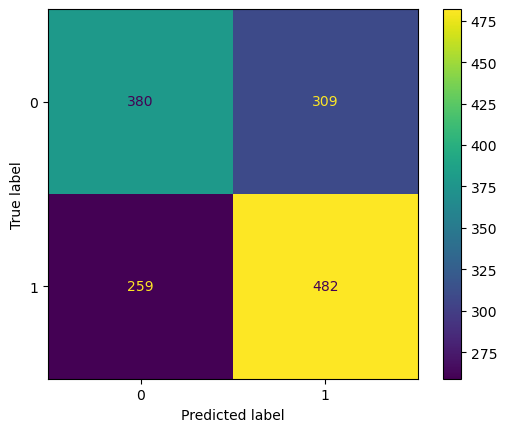

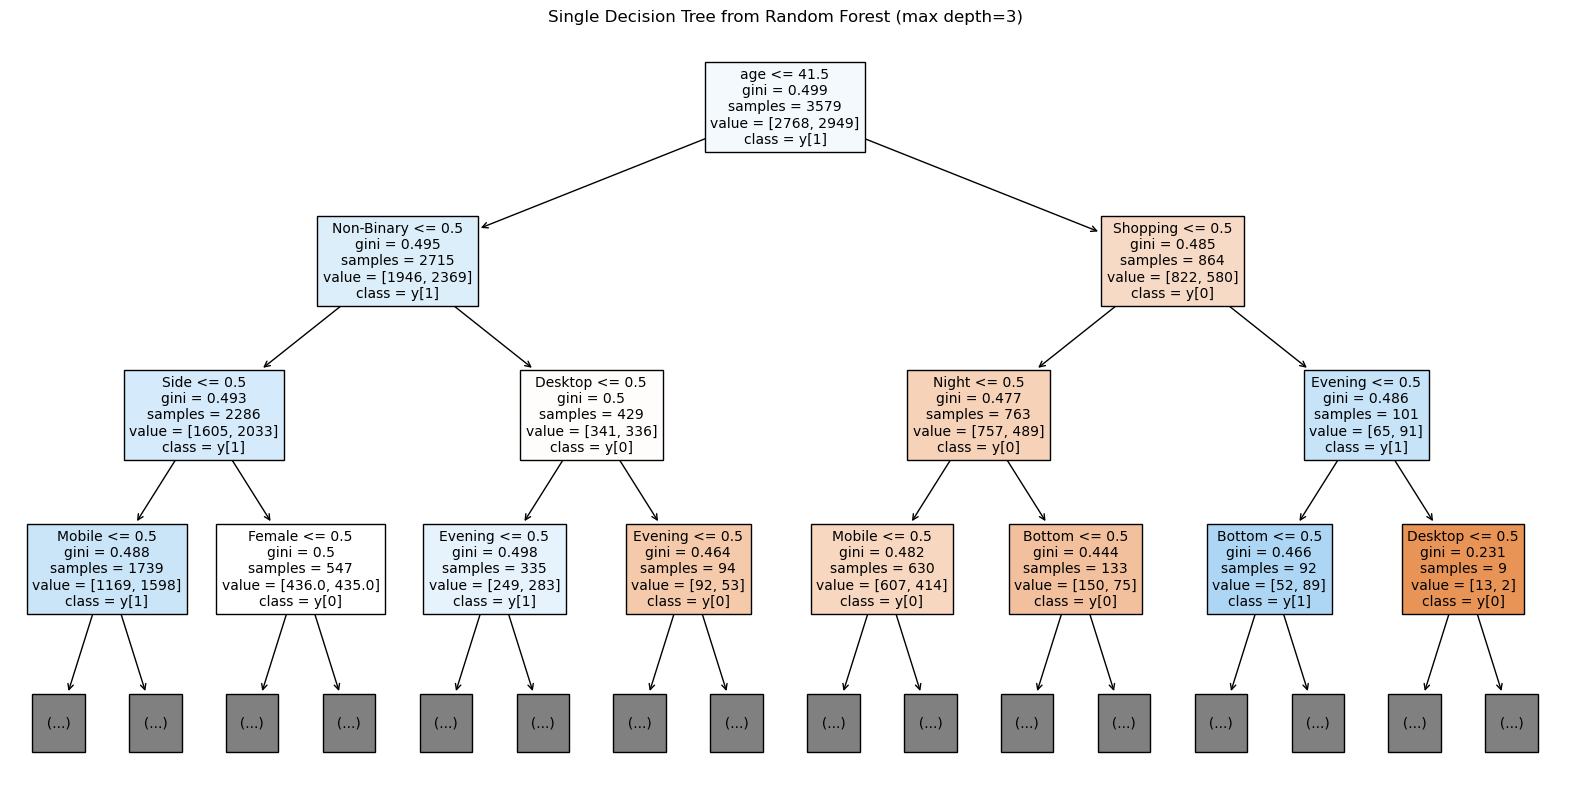

In [187]:
# import libraries for model visualization
from sklearn.tree import plot_tree

# Print classification report
print("Accuracy: ", accuracy_score(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

# Print confusion matrix
labels = [0,1]
cm = confusion_matrix(y2_test, y2_pred, labels=labels)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp2.plot();

# Plot the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], filled=True, feature_names=X2_train.columns, class_names=True, max_depth=3, fontsize=10)
plt.title("Single Decision Tree from Random Forest (max depth=3)")
plt.show()

Above, you can see the confusion matrix for this model, as well as one decision tree from the Random Forest. When using the model, predictions would be made off multiple decision trees, but the visual above gives a good idea of how the model makes its selections. The visual of this descion tree is limited to 3 layers, but the tree itself has many more.

 Similarly to the Naive Bayes model, the Random Forest model performs slightly better than 50%. With this model, the average performance seems to be closer to 60% accuracy, which is an improvement over the Naive Bayes model, but still not nearly close enough to consider the model reliable.

### Model 3 - Logistic Regression

The final model is a Logistic Regression model. Similar to a Linear Regression model, the Logistic Regression model works by giving each variable a numerical weight, then adding up the weight of each variable to get a numeric value for the entry. The entry is then placed into whichever category holds that numerical value. For example, a linear regression model for predicting grades on a test may return values like 79, 83, or 99. The logistic regression model takes those values and places them in the proper category, such as 79 = C, 83 = B, and 99 = A. Logistic Regression models also work with null values meaning we do not have to alter <b>age</b>. 

In [188]:
# create a copy of the dataframe
df_model3 = df_clean

# Split data into predictors and target
X3 = df_model3.drop(columns = ['id', 'full_name', 'click'])
y3 = df_model3['click']

# Split data into train and test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=7)

# Show the shape of training and testing data
print("X3_train shape: ", X3_train.shape)
print("X3_test shape: ", X3_test.shape)
print("y3_train shape: ", y3_train.shape)
print("y3_test shape: ", y3_test.shape)

X3_train shape:  (5717, 19)
X3_test shape:  (1430, 19)
y3_train shape:  (5717,)
y3_test shape:  (1430,)


In [189]:
# import libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
lr = LogisticRegression(random_state=16)
lr.fit(X3_train, y3_train)

# Predict on the test data
y3_pred = lr.predict(X3_test)

Accuracy:  0.5797202797202797
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       677
           1       0.61      0.57      0.59       753

    accuracy                           0.58      1430
   macro avg       0.58      0.58      0.58      1430
weighted avg       0.58      0.58      0.58      1430



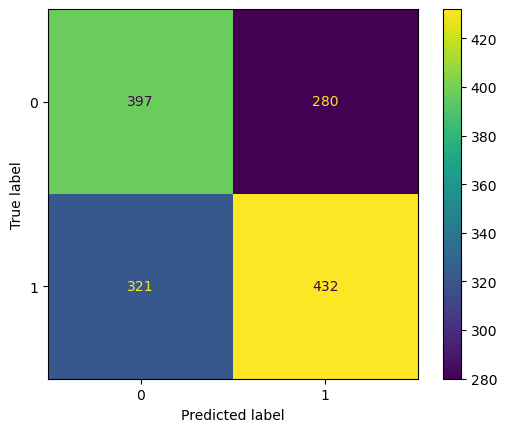

In [191]:
# print classification report
print("Accuracy: ", accuracy_score(y3_test, y3_pred))
print(classification_report(y3_test, y3_pred))

# Print confusion matrix
labels = [0,1]
cm = confusion_matrix(y3_test, y3_pred, labels=labels)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp3.plot();

Like with the previous two models, the Logistic Regression model fails to have a predictive accuracy worthy of being called reliable. Similar to the Naive Bayes model, this model averages a little over 55% accuracy. However, one thing to note with this model is that we can see the model's full calculations below. The table below is called a coefficient matrix. It shows the coeffiecients, or "weight" as we referred to it above, for each variable. This matrix allows us to calculate a prediction by hand if we chose to. For a majority of these variables, these coefficients are directly added to the equation because each variable is added as (Numeric Value of Column X) * (Coefficient of Column X), and since booleans only return 0 or 1, when processed these values either equal 0 or the coefficient. The only variable that does not do this is <b>age</b>, as it's value can be more than just 0 or 1. If an entry has an age 41 the equation would add it as (41)*(-0.006578). The default cutoff point for Logistic Regressions is 0.5, meaning any calculation that returns greater than or equal to 0.5 is categorized as a target value of 1 and anything below 0.5 is a target value of 0.

In [192]:
# Extract coefficients and match with feature names
coefficients = lr.coef_[0]
features = X3_train.columns

# Create a DataFrame to display feature names and their coefficients
coef_df = pd.DataFrame({"Feature": features, "Coefficient": coefficients})
print(coef_df)

          Feature  Coefficient
0             age    -0.006578
1          Female    -0.036330
2            Male     0.043909
3      Non-Binary    -0.095207
4         Desktop    -0.400161
5          Mobile    -0.573642
6          Tablet    -0.513995
7          Bottom    -0.252426
8            Side    -0.537651
9             Top    -0.528315
10      Education    -0.285899
11  Entertainment    -0.004828
12           News    -0.503456
13       Shopping    -0.141360
14   Social Media    -0.185196
15      Afternoon    -0.326165
16        Evening    -0.568312
17        Morning    -0.383402
18          Night    -0.512378


## Conclusions and Impact

Based on the three models, it is safe to say that "whether an individual clicks on an ad or not" cannot be determined using these variables, or at least using this data. The data's incredible balance actually became its downfall, as without any patterns to analyze, a model can do no better than guess which category an entry belongs to. Using the coefficient matrix from the logistic regression model, we can make some claims towards our initial question. What is the best strategy for getting a viewer to click an ad? According to the model, the best combination of variables would be to place an ad at the bottom of a page and show the ad to a young male, using a desktop, previously browsing entertainment sites in the afternoon. This elaborate combination of variables gives the best odds of a viewer clicking the ad, but as mentioned before, these results need to be taken with a heavy dose of salt. 

If these findings were taken as factual, it would have an impact of general audiences. Ads today are already targetted towards people based on viewing habits, shopping patterns, etc. These findings mean young men would likely be targetted for a lot more ads moving forward. On the flipside, viewers may be better able to avoid ads by browsing on certain websites, on specific platforms, or during specific hours that are less likely to benefit advertisers, which could have a positive impact on a user's experience. Due to the inconclusive nature of the research, a negative impact could fall on advertisers spending additional funds to better target certain groups and not earning enough to make it worth the additional expenses, though this means they could also pull funding from advertisements being used in ill-fitting locations, which could in turn save them money. 

This research alone logically cannot dramatically impact the field of advertising, as the data is too inconclusive. However, this research could be viewed as a good starting point in future analyses asking a similar question. People have become accustomed to seeing and ignoring ads. Many people have trained themselves to block out advertisements entirely when browsing the internet, which means companies hoping to draw attention to their goods or services have to work extra hard to be seen and earn the click. 

The logical next step for furthering this research would be to collect more data and potentially add new variables such as the ad's color or if the ad is a still image versus a video. A majority of the speedbumbs through this research were due to inconclusive data. One can only assume that as more data is collected, a pattern will begin to show itself, allowing for a better predictive model and support behind an answer.

### Sources

Dataset: https://www.kaggle.com/datasets/marius2303/ad-click-prediction-dataset

Sources for Assistance with Modeling:
- https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
- https://www.datacamp.com/tutorial/random-forests-classifier-python
- https://www.datacamp.com/tutorial/understanding-logistic-regression-python